In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
import matplotlib.pyplot as plt

In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
import joblib
from joblib import dump, load
joblib.dump(train_data,'train_data.pkl')
joblib.dump(train_targets,'train_targets.pkl')
joblib.dump(test_data,'test_data.pkl')
joblib.dump(test_targets,'test_targets.pkl')

['test_targets.pkl']

In [3]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [8]:
len(train_targets)

404

In [9]:
len(test_targets)

102

In [10]:
std=train_data.std(axis=0)
mean=train_data.mean(axis=0)
train_data-=mean
train_data/=std
test_data-=mean
test_data/=std

In [16]:
def build_model():
  model=keras.Sequential([
      layers.Dense(64,activation='relu'),
      layers.Dense(64,activation='relu'),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop",loss="mse",metrics=['mae'])
  return model

In [19]:
k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]
for i in range(k):
  print(f"processing fold #{i}")
  val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data=np.concatenate([train_data[:i*num_val_samples],
                                     train_data[(i+1)*num_val_samples:]],
                                    axis=0)
  partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],
                                     train_targets[(i+1)*num_val_samples:]],
                                       axis=0)

  model=build_model()
  model.fit(partial_train_data,partial_train_targets,
            epochs=num_epochs,batch_size=16,verbose=0)
  val_mse,val_mae=model.evaluate(val_data,val_targets,verbose=0)
  all_scores.append(val_mae)
print(all_scores)
print(np.mean(all_scores))
print(np.sum(all_scores)/len(all_scores))



processing fold #0
processing fold #1
processing fold #2
processing fold #3
[1.9219629764556885, 2.5539393424987793, 2.3537981510162354, 2.3846325874328613]
2.303583264350891
2.303583264350891


In [27]:
def build_model():
  model=keras.Sequential([
      layers.Dense(16,activation='relu'),
      layers.Dense(16,activation='relu'),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop",loss="mse",metrics=['mae'])
  return model

In [32]:
k=5
num_val_samples=len(train_data)//k
num_epochs=300
all_mae_histories=[]
for i in range(k):
  print(f"processing fold #{i}")
  val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  partial_train_data=np.concatenate([train_data[:i*num_val_samples],
                                     train_data[(i+1)*num_val_samples:]],
                                    axis=0)
  partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],
                                     train_targets[(i+1)*num_val_samples:]],
                                       axis=0)

  model=build_model()
  history=model.fit(partial_train_data,partial_train_targets,validation_data=(val_data,val_targets),
                    epochs=num_epochs,batch_size=16,verbose=0)
  mae_history=history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold #0
processing fold #1
processing fold #2
processing fold #3
processing fold #4


In [33]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

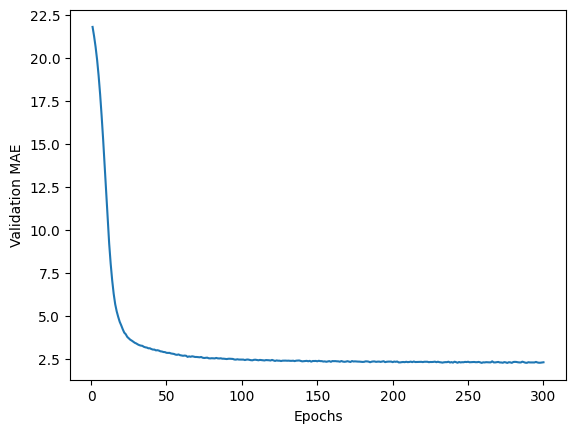

In [34]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

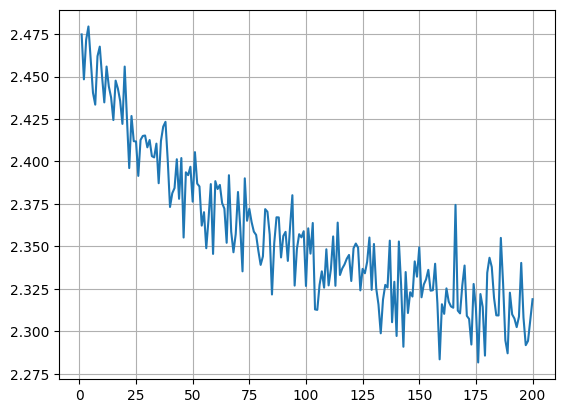

In [35]:
truncated_mae_hist=average_mae_history[100:]
plt.plot(range(1,len(truncated_mae_hist)+1),truncated_mae_hist)
plt.grid()
plt.show()

In [55]:
final_model=keras.Sequential([
      layers.Dense(64,activation='relu'),
      layers.Dense(64,activation='relu'),
      layers.Dense(1)
  ])
final_model.compile(optimizer="rmsprop",loss="mse",metrics=['mae'])

final_model.fit(train_data,train_targets,epochs=275,batch_size=16,verbose=0)

In [56]:
train_pred=final_model.predict(train_data)
test_pred=final_model.predict(test_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [57]:
from sklearn.metrics import mean_absolute_error
train_mae=mean_absolute_error(train_targets,train_pred)
test_mae=mean_absolute_error(test_targets,test_pred)
print(f"train mse: {train_mae}; test mse: {test_mae}")

train mse: 0.9130476559742843; test mse: 2.2702502755557794


In [59]:
from sklearn.metrics import r2_score
train_r2=r2_score(train_targets,train_pred)
test_r2=r2_score(test_targets,test_pred)
print(f"train r2: {train_r2}; test r2: {test_r2}")

train r2: 0.9795206007601684; test r2: 0.8627836026293343


# New Section

In [58]:
joblib.dump(final_model,"boston_housing_price_pred_model.pkl")

['boston_housing_price_pred_model.pkl']